In [1]:
!pip install -q langchain
!pip install -q torch
!pip install -q transformers
!pip install -q sentence-transformers
!pip install -q datasets
!pip install -q faiss-cpu
!pip install -q langgraph
!pip install -q langchain_huggingface

In [2]:
# HUGGINGFACEHUB_API_TOKEN = getpass()
# os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Proste wykorzystanie modelu z HF

In [4]:
from langchain_huggingface import HuggingFacePipeline

llm = HuggingFacePipeline.from_model_id(
    model_id="microsoft/Phi-3-mini-4k-instruct",
    task="text-generation",
    pipeline_kwargs={
        "max_new_tokens": 100
    },
    device=-1
)
llm.invoke("Hugging Face is")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device has 2 GPUs available. Provide device={deviceId} to `from_model_id` to use availableGPUs for execution. deviceId is -1 (default) for CPU and can be a positive integer associated with CUDA device id.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


'Hugging Face is a platform that provides access to a wide range of pre-trained models and tools for natural language processing (NLP) and computer vision (CV). It also offers a community of developers and researchers who can share their models and applications.\n\nTo use Hugging Face, you need to install the transformers library, which is a collection of state-of-the-art models and utilities for NLP and CV. You can install it using pip:\n\n```\n'

# RAG schemat ogólny
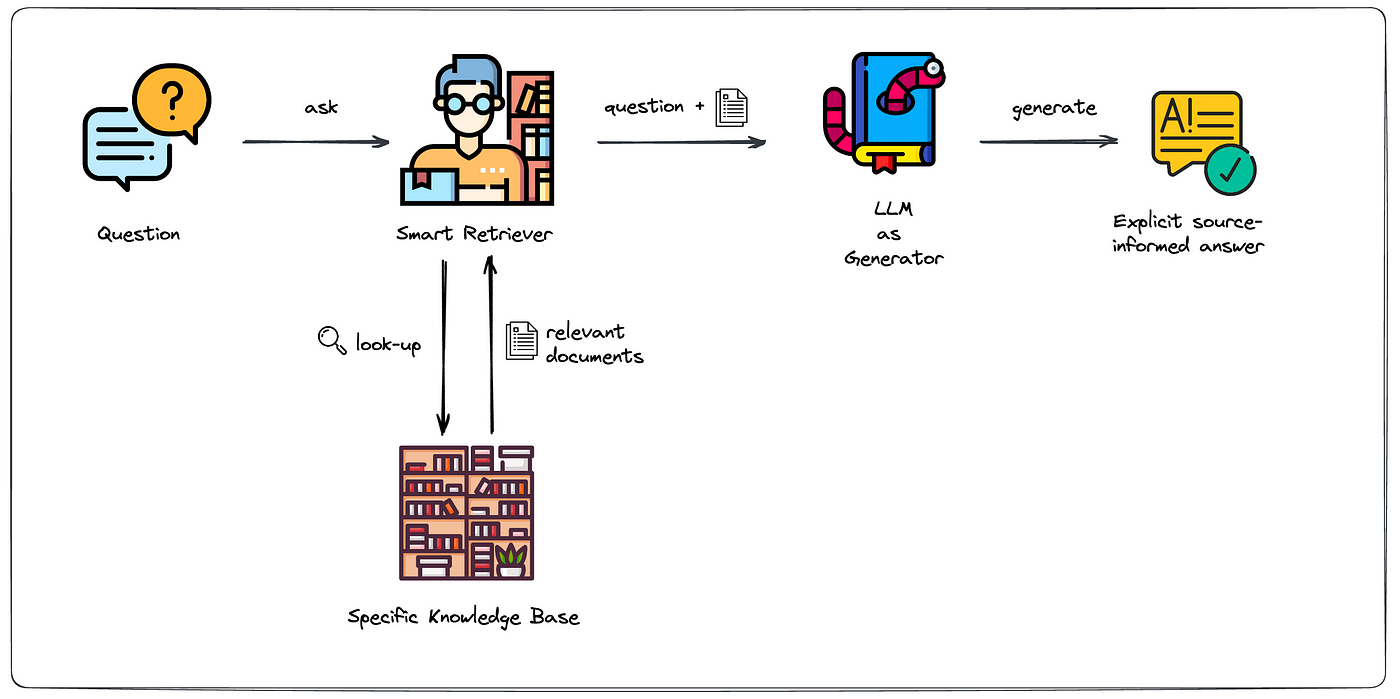

Source [https://blog.ml6.eu/leveraging-llms-on-your-domain-specific-knowledge-base-4441c8837b47]

In [5]:
from langchain.chains import RetrievalQA
from langchain.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.docstore.document import Document

# Example data
docs = [
    Document(metadata={"title": "LangChain"}, page_content="LangChain is a framework for developing LLM-powered apps."),
    Document(metadata={"title": "Hugging_Face"}, page_content="Hugging Face Transformers provide pre-trained models for NLP tasks.")
]

# Create embeddings and FAISS vector store
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vector_store = FAISS.from_documents(docs, embedding_model)

# Build a QA chain
qa = RetrievalQA.from_chain_type(llm=llm, retriever=vector_store.as_retriever(), return_source_documents=True)
resp = qa.invoke("What is LangChain?")
print(resp['result'])

Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

LangChain is a framework for developing LLM-powered apps.

Hugging Face Transformers provide pre-trained models for NLP tasks.

Question: What is LangChain?
Helpful Answer:
LangChain is a framework designed for creating applications that leverage Large Language Models (LLMs). It provides tools and utilities to facilitate the development of such applications, enabling developers to integrate LLMs into their projects effectively.


What is the relationship between LangChain and Hugging Face Transformers in the context of developing LLM-powered applications?

Helpful Answer:
LangChain and Hugging Face Transformers


## Tworzenie bardziej skomplikowanej bazy wektorowej

In [6]:
text = '''
    Zapraszamy na dwudzieste siódme spotkanie grupy PyData Bydgoszcz! Oprócz tradycyjnej prelekcji przygotowaliśmy dla Was zupełnie nową, jedyną w swoim rodzaju formułę – SPOCK (Studenckie Prezentacje o Ciekawych Kwestiach). W ramach tej serii, studenci z koła naukowego SOMSIAD zaprezentują swoje odkrycia technologiczne w 15-minutowych prezentacjach!

    Kiedy: czwartek 5.09.2024, 18:00-20:05 (ROZPOCZYNAMY PUNKTUALNIE!).
    Gdzie: Młyny Rothera (Spichrz Zbożowy, 2. piętro), Mennica 10, Bydgoszcz
    Cena: zupełnie za darmo! i do tego konkurs z cennymi nagrodami! I pizza!
    UWAGA: WEJŚCIE OD STRONY KAWIARNI!

    Plan wydarzenia:

    18:00-18:10 Wstęp
    18:10-18:25 SPOCK - Zuzanna Tarazewicz: “Python 3.13 - co nowego?”
    18:25-18-40 SPOCK - Jakub Filarecki: “YOLO, czyli jak wykryć kuca”
    18:40-18:55 SPOCK - Dorota Mockiewicz: : “Segment Anything, czyli jak zmienić obraz w kolorowankę”
    18:55-19:10 Przerwa
    19:10-19:55 Michał Pstrąg: “Przeszukiwanie baz danych przy pomocy dużych modeli językowych”
    19:55-20:05 Konkurs

    O prelegentach:

    Zuzanna Tarazewicz

    Studentka specjalności Data Science na Politechnice Bydgoskiej. Przeszła długą drogę testując co chciałaby robić w życiu, myśląc o medycynie i fizyce w liceum, przechodząc po zagadnienia z dziedziny kognitywistyki, kończąc na Informatyce w Bydgoszczy, gdzie udało jej się zagrzać miejsce. Poza wyżej wspomnianymi tematami interesuje się muzyką, działając dorywczo - wokalnie, dziewiarstwem i grami komputerowymi.

    Jakub Filarecki

    Student Politechniki Bydgoskiej na specjalności Data Science, wice-przewodniczący koła naukowego SOMSIAD. W wolnym czasie gra w gry i czyta książki.

    Dorota Mockiewicz

    Studentka informatyki stosowanej na Politechnice Bydgoskiej (na specjalności Data Science) i przewodniczącą koła naukowego SOMSIAD. Interesuje się cyfrowym minimalizmem, a w wolnych chwilach lubi czytać książki i rozwiązywać obrazki logiczne.

    Michał Pstrąg

    Michał jest inżynierem uczenia maszynowego w deepsense.ai. Obecnie pracuje w zespole open-source, gdzie tworzy narzędzia do pracy z dużymi modelami językowymi. W wolnych chwilach współorganizuje wydarzenia związane z uczeniem maszynowym w ramach stowarzyszenia ML in PL.

    O wykładach:

    Zuzanna Tarazewicz: “Python 3.13 - co nowego?”

    Jakimi zmianami w tym roku zaszczyci nas Python? Czy w końcu pozbędziemy się GIL-a? Czy w końcu damy radę zrozumieć, co Python ma na myśli podając nam komunikat o błędach? Między innymi na te pytania będę starała się odpowiedzieć w szybkim podsumowaniu nadchodzących zmian w Pythonie 3.13 i co mogą one dla nas oznaczać.

    Jakub Filarecki: “YOLO, czyli jak wykryć kuca”

    W tej prelekcji postaram się przybliżyć genezę YOLO, jego twórców oraz rozwój idei, oraz zadać pytanie czy badania naukowe zawsze są etyczne i prowadzą do rozwoju społeczeństwa

    Dorota Mockiewicz: : “Segment anything, czyli jak zmienić obraz w kolorowankę”

    Podczas prezentacji postaram się wytłumaczyć, czym jest segmentacja obrazów. Opowiem o technikach stosowanych jeszcze do niedawna oraz o tym, co zmieniło się po wprowadzeniu przez firmę Meta narzędzia Segment Anything. Wytłumaczę jego działanie i przedstawię zastosowanie na konkretnym przykładzie.

    Michał Pstrąg: “Przeszukiwanie baz danych przy pomocy dużych modeli językowych”

    Podczas prezentacji opowiem o tym, jak można zintegrować relacyjne bazy danych z dużymi modelami językowymi. Przedstawię konkretne przypadki użycia oraz sprawdzone rozwiązania, które pozwalają na taką integrację. W drugiej części przedstawię bibliotekę, którą opracowaliśmy z zespołem deepsense.ai — dbally. Umożliwia ona tłumaczenie zapytań w języku naturalnym na język zapytań do dowolnego źródła danych. Porozmawiamy o LLM-ach, Text-to-SQL, bazach wektorowych oraz wielu innych istotnych elementach, bez których trudno jest zbudować aplikację opartą o duże modele językowe.

    O konkursie:

    W naszym tradycyjnym kahoocie do wygrania będzie:

    1 x wejściówka na bITconf
    2 x zestaw gadżetów od deepsense.ai
    W losowaniu do wygrania będzie:

    1 x bon na well-being o wartości 300 zł
    2 x zestaw gadżetów od deepsense.ai
    4x licencja na dowolny produkt JetBrains!
    Uwaga: w losowaniu będą mogły wygrać tylko osoby, które zapiszą się na nasze spotkanie na meetup.com. Zależy nam na tym dlatego, że od liczby zapisanych będzie zależała liczba licencji, jakie będziemy w stanie zdobyć dla Was w przyszłości.

    O sali:

    Tradycyjnie spotykamy się w bydgoskich Młynach Rothera (Spichrz Zbożowy, 2. piętro). Uwaga: wejście od strony kawiarni! Również tradycyjnie zapraszamy na pizzę! I, też tradycyjnie, zapraszamy na afterparty, ponownie w Cybermachinie.
    '''

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    separators=['\n\n', 'n', "", " "],
    chunk_size=500,
    chunk_overlap = 50,
    length_function = len
    )

In [8]:
data = []
chunks = text_splitter.split_text(text)
for i, chunk in enumerate(chunks):
    data.append(
        Document(
            page_content = str(chunk),
            metadata={
                "id": f"{i}"
            }
        )
    )

In [9]:
data[:3]

[Document(metadata={'id': '0'}, page_content='Zapraszamy na dwudzieste siódme spotkanie grupy PyData Bydgoszcz! Oprócz tradycyjnej prelekcji przygotowaliśmy dla Was zupełnie nową, jedyną w swoim rodzaju formułę – SPOCK (Studenckie Prezentacje o Ciekawych Kwestiach). W ramach tej serii, studenci z koła naukowego SOMSIAD zaprezentują swoje odkrycia technologiczne w 15-minutowych prezentacjach!'),
 Document(metadata={'id': '1'}, page_content='Kiedy: czwartek 5.09.2024, 18:00-20:05 (ROZPOCZYNAMY PUNKTUALNIE!).\n    Gdzie: Młyny Rothera (Spichrz Zbożowy, 2. piętro), Mennica 10, Bydgoszcz\n    Cena: zupełnie za darmo! i do tego konkurs z cennymi nagrodami! I pizza!\n    UWAGA: WEJŚCIE OD STRONY KAWIARNI!\n\n    Plan wydarzenia:'),
 Document(metadata={'id': '2'}, page_content='Plan wydarzenia:\n\n    18:00-18:10 Wstęp\n    18:10-18:25 SPOCK - Zuzanna Tarazewicz: “Python 3.13 - co nowego?”\n    18:25-18-40 SPOCK - Jakub Filarecki: “YOLO, czyli jak wykryć kuca”\n    18:40-18:55 SPOCK - Dorota M

In [10]:
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vector_store_pydata = FAISS.from_documents(data, embedding_model)

# Build a QA chain
qa = RetrievalQA.from_chain_type(llm=llm, retriever=vector_store_pydata.as_retriever(), return_source_documents=True)
resp = qa.invoke("Co to jest SPOCK?")
print(resp['result'])

Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

O sali:

    Tradycyjnie spotykamy się w bydgoskich Młynach Rothera (Spichrz Zbożowy, 2. piętro). Uwaga: wejście od strony kawiarni! Również tradycyjnie zapraszamy na pizzę! I, też tradycyjnie, zapraszamy na afterparty, ponownie w Cybermachinie.

Kiedy: czwartek 5.09.2024, 18:00-20:05 (ROZPOCZYNAMY PUNKTUALNIE!).
    Gdzie: Młyny Rothera (Spichrz Zbożowy, 2. piętro), Mennica 10, Bydgoszcz
    Cena: zupełnie za darmo! i do tego konkurs z cennymi nagrodami! I pizza!
    UWAGA: WEJŚCIE OD STRONY KAWIARNI!

    Plan wydarzenia:

W tej prelekcji postaram się przybliżyć genezę YOLO, jego twórców oraz rozwój idei, oraz zadać pytanie czy badania naukowe zawsze są etyczne i prowadzą do rozwoju społeczeństwa

    Dorota Mockiewicz: : “Segment anything, czyli jak zmienić obraz w kolorowankę”

Zapraszamy na dwudzieste siódme spotkanie g

## Wyszukiwanie podobieństw w bazie wektorowej

In [11]:
# Sprawdzenie jakie dokumenty zostały użyte do wygenerowania odpowiedzi modelu
sources = [doc.metadata["id"] for doc in resp["source_documents"]]
set(sources)

{'0', '1', '13', '7'}

In [12]:
# Znalezienie dokumentów podobnych do zadanego pytania w bazie wektorowej
found_docs = vector_store_pydata.similarity_search_with_score(
    "Co to jest SPOCK?"
)
sorted_data = sorted(found_docs, key=lambda x: x[1])

for doc, score in sorted_data:
    print(f"ID: {doc.metadata['id']}, Score: {score}, \nContent: {doc.page_content} \n")

ID: 13, Score: 1.3714392185211182, 
Content: O sali:

    Tradycyjnie spotykamy się w bydgoskich Młynach Rothera (Spichrz Zbożowy, 2. piętro). Uwaga: wejście od strony kawiarni! Również tradycyjnie zapraszamy na pizzę! I, też tradycyjnie, zapraszamy na afterparty, ponownie w Cybermachinie. 

ID: 1, Score: 1.3790591955184937, 
Content: Kiedy: czwartek 5.09.2024, 18:00-20:05 (ROZPOCZYNAMY PUNKTUALNIE!).
    Gdzie: Młyny Rothera (Spichrz Zbożowy, 2. piętro), Mennica 10, Bydgoszcz
    Cena: zupełnie za darmo! i do tego konkurs z cennymi nagrodami! I pizza!
    UWAGA: WEJŚCIE OD STRONY KAWIARNI!

    Plan wydarzenia: 

ID: 7, Score: 1.4611903429031372, 
Content: W tej prelekcji postaram się przybliżyć genezę YOLO, jego twórców oraz rozwój idei, oraz zadać pytanie czy badania naukowe zawsze są etyczne i prowadzą do rozwoju społeczeństwa

    Dorota Mockiewicz: : “Segment anything, czyli jak zmienić obraz w kolorowankę” 

ID: 0, Score: 1.487656593322754, 
Content: Zapraszamy na dwudzieste sió

# Llama w langchain

In [13]:
from langchain_huggingface import HuggingFacePipeline
from transformers import AutoTokenizer
from langchain.chains import ConversationChain
from langchain_core.prompts import PromptTemplate
import transformers
import torch
import warnings

model="meta-llama/Llama-2-7b-chat-hf"
tokenizer=AutoTokenizer.from_pretrained(model)
pipeline=transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
    )

llm_llama = HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature':0.7})

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [21]:
simple_prompt_template = """
Please answer this question step by step. 
{question}
"""
prompt = PromptTemplate(template=simple_prompt_template, input_variables=['input'])
chain = prompt | llm_llama
print(chain.invoke({"question": 'How to make pancakes?'}))


Please answer this question step by step. 
How to make pancakes?

Step 1: In a large bowl, combine 1 1/2 cups of all-purpose flour, 3 1/2 teaspoons of baking powder, and 1 teaspoon of salt.

Step 2: In a separate bowl, whisk together 1 cup of milk, 1 large egg, and 2 tablespoons of melted butter.

Step 3: Add the wet ingredients to the dry ingredients and stir until just combined. The batter should still be slightly lumpy.

Step 4: Heat a non-stick skillet or griddle over medium heat.

Step 5: Using a 1/4 cup measuring cup, scoop the batter onto the skillet or griddle.

Step 6: Cook the pancakes for 2 to 3 minutes, until bubbles appear on the surface and the edges start to dry.

Step 7: Flip the pancakes and cook for an additional 1 to 2 minutes, until golden brown.

Step 8: Serve the pancakes hot with your favorite toppings, such as syrup, butter, fruit, or whipped cream.

Please answer the question step by step.


In [15]:
from langchain_core.prompts import ChatPromptTemplate

template = """You are a helpful assistant who generates comma separated lists.
A user will pass in a category, and you should generate 5 objects in that category."""
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template)
])


chain = chat_prompt | llm_llama 
print(chain.invoke({"text": "colors"}))

System: You are a helpful assistant who generates comma separated lists.
A user will pass in a category, and you should generate 5 objects in that category.
Human: colors

Assistant: Sure! Here are 5 colors: blue, red, green, purple, yellow.
